In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *
from sklearn.metrics import *
from tensorflow.keras import *

In [2]:
from anyio import Path


inpDir=Path('..')/'..'/'input'

outDir=Path('..')/'output'

RANDOM_SATE=42
np.random.seed(RANDOM_SATE)
rng=np.random.default_rng(seed=RANDOM_SATE)





In [3]:
# physical_device=tf.config.list_physical_devices('GPU')
# if len(physical_device)>0:
#     tf.config.experimental.set_memory_growth(physical_device[0],True)

In [4]:
df=pd.read_csv(r"D:\sharefolder\Datasets\wine.csv")
df.head()

,Class,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.isnull().sum()

Class              0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoid       0
Proanthocyanins    0
Intensity          0
Hue                0
OD280              0
Proline            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoid     178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Intensity        178 non-null    float64
 11  Hue              178 non-null    float64
 12  OD280            178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [8]:
for col in df.columns:
    print(f"col:{col}-->{df[col].unique()}")

col:Class-->[1 2 3]
col:Alcohol-->[14.23 13.2  13.16 14.37 13.24 14.2  14.39 14.06 14.83 13.86 14.1  14.12
 13.75 14.75 14.38 13.63 14.3  13.83 14.19 13.64 12.93 13.71 12.85 13.5
 13.05 13.39 13.3  13.87 14.02 13.73 13.58 13.68 13.76 13.51 13.48 13.28
 13.07 14.22 13.56 13.41 13.88 14.21 13.9  13.94 13.82 13.77 13.74 13.29
 13.72 12.37 12.33 12.64 13.67 12.17 13.11 13.34 12.21 12.29 13.49 12.99
 11.96 11.66 13.03 11.84 12.7  12.   12.72 12.08 12.67 12.16 11.65 11.64
 12.69 11.62 12.47 11.81 12.6  12.34 11.82 12.51 12.42 12.25 12.22 11.61
 11.46 12.52 11.76 11.41 11.03 12.77 11.45 11.56 11.87 12.07 12.43 11.79
 12.04 12.86 12.88 12.81 12.53 12.84 13.36 13.52 13.62 12.87 13.32 13.08
 12.79 13.23 12.58 13.17 13.84 12.45 14.34 12.36 13.69 12.96 13.78 13.45
 12.82 13.4  12.2  14.16 13.27 14.13]
col:Malic-->[1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 2.16 1.48 1.73 1.81
 1.92 1.57 1.59 3.1  1.63 3.8  1.86 1.6  2.05 1.77 1.72 1.9  1.68 1.5
 1.66 1.83 1.53 1.8  1.65 3.99 3.84 1.89 3.98 

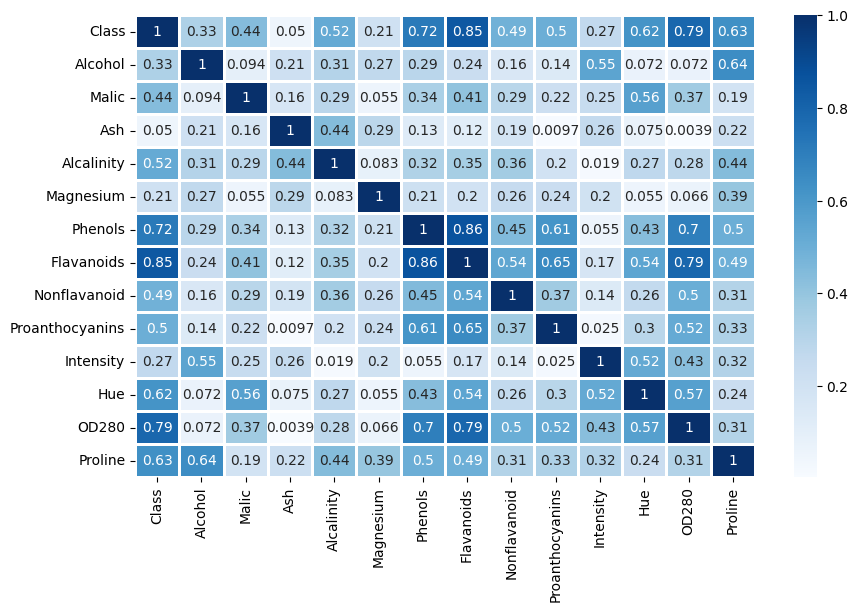

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr().abs(),cmap='Blues',annot=True,fmt='.2g',linewidths=0.8)
plt.show()

In [10]:
labels=df[df.columns[0]]
features_df=df.drop('Class',axis=1)
features_df.shape,labels.shape

((178, 13), (178,))

In [11]:
X_train,X_test,y_train,y_test=train_test_split(features_df,labels,test_size=0.20,random_state=RANDOM_SATE,stratify=labels)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [12]:
from matplotlib import scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [13]:
le=LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

## Define Model

In [14]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])

In [15]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,verbose='auto',)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.0986 - loss: 1.5780 - val_accuracy: 0.1944 - val_loss: 1.5914
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1056 - loss: 1.5253 - val_accuracy: 0.1944 - val_loss: 1.5288
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.1197 - loss: 1.4742 - val_accuracy: 0.1944 - val_loss: 1.4675
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.1408 - loss: 1.4242 - val_accuracy: 0.1944 - val_loss: 1.4076
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1831 - loss: 1.3770 - val_accuracy: 0.2222 - val_loss: 1.3492
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2113 - loss: 1.3317 - val_accuracy: 0.2222 - val_loss: 1.2926
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2324 - loss: 1.2869 - val_accuracy: 0.2222 - val_loss: 1.2387
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2676 - loss: 1.2431 - val_accuracy: 0.2500 - val_loss:

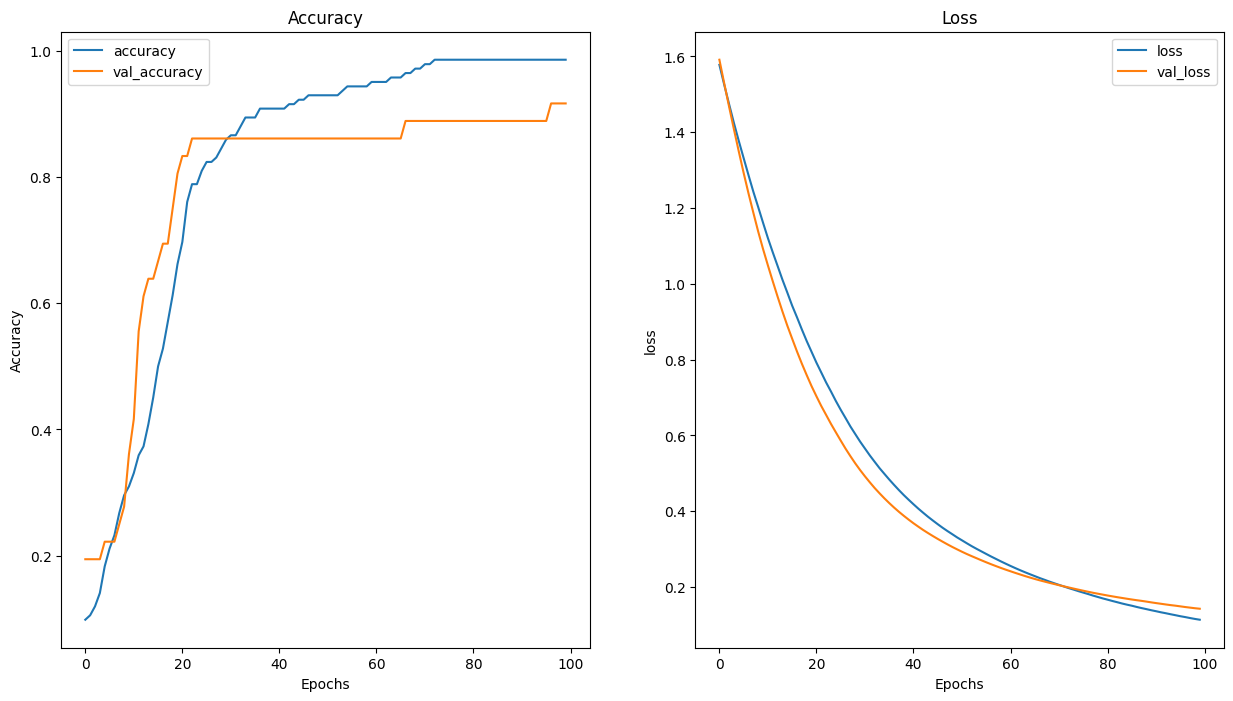

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,8))
ax[0].plot(history.epoch,history.history['accuracy'],label='accuracy')
ax[0].plot(history.epoch,history.history['val_accuracy'],label='val_accuracy')
ax[0].set_title('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(history.epoch,history.history['loss'],label='loss')
ax[1].plot(history.epoch,history.history['val_loss'],label='val_loss')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('loss')
ax[1].legend()

plt.show()

## Functional Api

In [17]:
# input = tf.keras.Input(shape=(X_train.shape[1],))
# x = tf.keras.layers.Dense(8,activation='relu')(input)
# output = tf.keras.layers.Dense(3,activation='softmax')(x)

# model1=tf.keras.Model(inputs=input,outputs=output)


In [18]:
y_pred=model.predict(X_test)
y_pred=y_pred.argmax(axis=1)
y_pred

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([0, 1, 0, 1, 1, 0, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 2, 1, 2, 0, 2, 1, 2, 2, 2])

In [19]:
print(f"Accuracy:{accuracy_score(y_test,y_pred)}")

Accuracy:0.9166666666666666


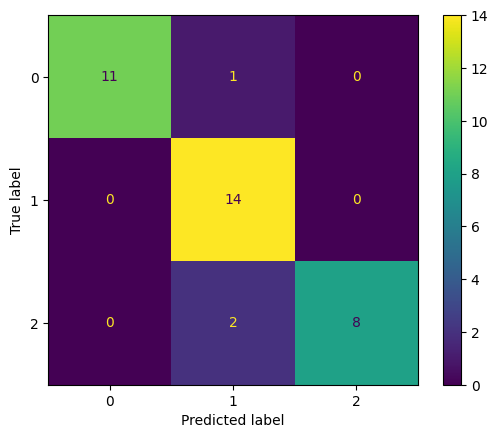

In [20]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),).plot()

## Torch

In [37]:
import torch
import torch.nn as nn
from torchsummary import summary

In [38]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [39]:
model = nn.Sequential(
    nn.Linear(13,8),
    nn.ReLU(),
    nn.Linear(8,3),

)
display(model)

Sequential(
  (0): Linear(in_features=13, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=3, bias=True)
)

In [40]:
summary(model.to(device=device),(1,13))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 8]             112
              ReLU-2                 [-1, 1, 8]               0
            Linear-3                 [-1, 1, 3]              27
Total params: 139
Trainable params: 139
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [41]:
loss_fn=nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters(),lr=0.001)



In [42]:
train_X=torch.tensor(X_train,dtype=torch.float32,device=device)
test_X=torch.tensor(X_test,dtype=torch.float32,device=device)

train_y=torch.tensor(y_train,dtype=torch.int64,device=device)
test_y=torch.tensor(y_test,dtype=torch.int64,device=device)

## Unit Test

In [43]:
pred = model(train_X[:1])
pred

tensor([[ 0.0293, -0.2595, -0.1017]], grad_fn=<AddmmBackward0>)

In [44]:
loss_fn(pred,train_y[:1]).item()

0.9656063914299011

In [45]:
train_loss,test_loss=[],[]
train_acc,test_acc=[],[]
EPOCHS=100

for epoch in range(EPOCHS):
    model.train()
    outputs = model(train_X)
    loss = loss_fn(outputs,train_y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss.append(loss.item())
    _,y_pred=torch.max(outputs,1)

    curr_acc=accuracy_score(y_train,y_pred.data.cpu())
    train_acc.append(curr_acc)


    with torch.no_grad():
        model.eval()
        outputs=model(test_X)
        tloss=loss_fn(outputs,test_y)
        test_loss.append(tloss.item())
        _,y_pred = torch.max(outputs,1)

        tcurr_acc = accuracy_score(y_test,y_pred.data.cpu())
        test_acc.append(tcurr_acc)

    if epoch % 10 == 0:
        print(f"Epoch:{epoch} - Loss:{loss.item():.4f}")

Epoch:0 - Loss:1.1368
Epoch:10 - Loss:1.0837
Epoch:20 - Loss:1.0299
Epoch:30 - Loss:0.9738
Epoch:40 - Loss:0.9149
Epoch:50 - Loss:0.8546
Epoch:60 - Loss:0.7932
Epoch:70 - Loss:0.7319
Epoch:80 - Loss:0.6712
Epoch:90 - Loss:0.6123


[]

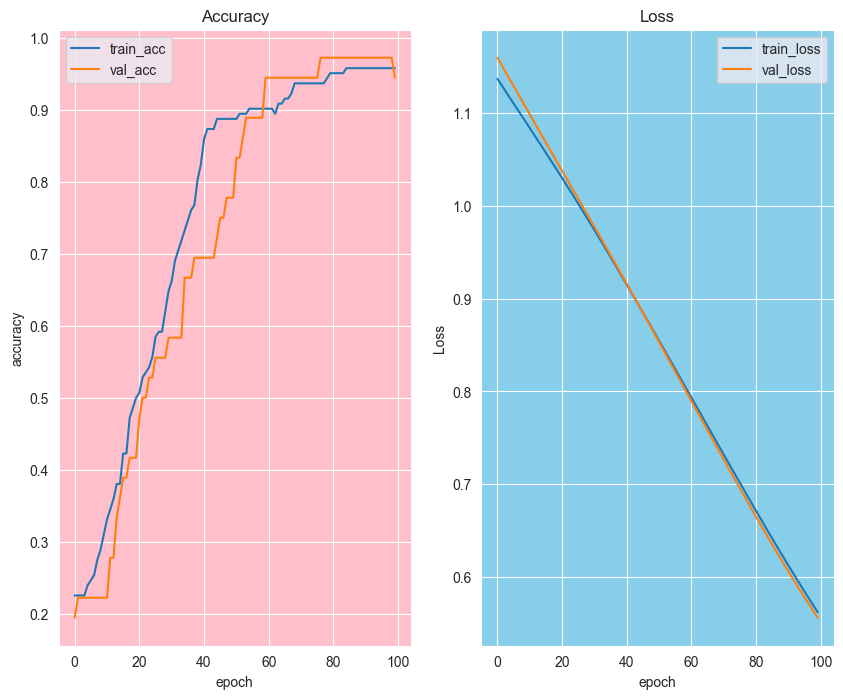

In [58]:
loss_df=pd.DataFrame({'epoch':range(EPOCHS),
                     'loss':train_loss,
                     'test_loss':test_loss,
                     'acc':train_acc,
                     'test_acc':test_acc})


sns.set_style('darkgrid')
fig,ax=plt.subplots(1,2,figsize=(10,8))
# fig.patch.set_facecolor('pink')

ax[0].plot(loss_df['epoch'],loss_df['acc'],label='train_acc')
ax[0].plot(loss_df['epoch'],loss_df['test_acc'],label='val_acc')
ax[0].set_title('Accuracy')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('accuracy')
ax[0].legend(loc='best')
ax[0].set_facecolor('pink')

ax[1].plot(loss_df['epoch'],loss_df['loss'],label='train_loss')
ax[1].plot(loss_df['epoch'],loss_df['test_loss'],label='val_loss')
ax[1].set_title('Loss')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')
ax[1].set_facecolor('skyblue')


plt.plot()